# Figures

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

colors = ['#ff3d44', '#ffb85c', '#fcfa62', '#80f569', '#74eafc', '#e969f5']
#          red        orange     yellow     green      blue       violet
colors = ['#ff3d44', '#74eafc', '#80f569', '#ffb85c', '#e969f5', '#fcfa62']
#          red        blue       green      orange     violet     yellow
df = pd.read_csv('./kangaroo.csv', encoding='utf-8')  

### go.scatter (species by year)

In [25]:
df_a = df.groupby(['Year']).sum()
df_a.drop('State', axis=1, inplace=True)
df_a.reset_index(inplace=True)
df_a

,Year,Red,Western Grey,Eastern Grey,Wallaroo
0,2001,17434513,3424992,29721271,6849250
1,2002,13633816,3764289,23383249,3064178
2,2003,8727856,2610931,13875828,2999906
3,2004,7987250,3019320,11111840,3196511
4,2005,7753247,2625708,10876498,3380838
5,2006,7892774,2642224,10424926,2647005
6,2007,7645963,3154658,10343615,2864374
7,2008,9292904,2879488,10363153,3360960
8,2009,9396985,3033719,11623924,2985695
9,2010,8542148,2790358,11409235,2416285


In [28]:
start_year = 2003
end_year = 2009
df_a = df_a[start_year - 2001 : end_year - 2000]

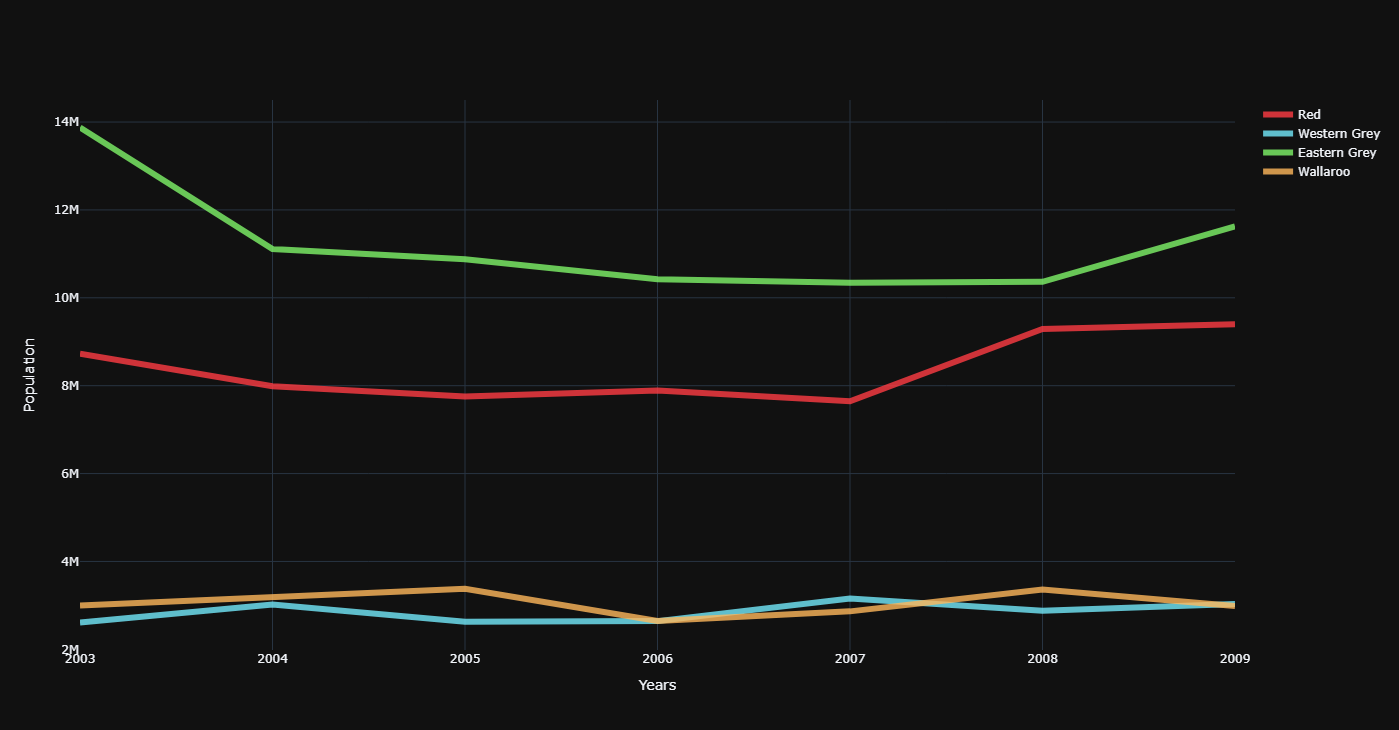

In [27]:
fig_a = go.Figure()
for i in range(len(df_a.columns[1:])):
    fig_a.add_trace(go.Scatter(x = df_a.Year.to_list(), 
                               y = df_a[df_a.columns[1:][i]].to_list(), 
                               opacity = 0.8, 
                               mode = 'lines', 
                               name = df_a.columns[1:][i], 
                               marker = dict(color=colors[i]),
                               line = dict(width=6.0),))
fig_a.update_layout(xaxis_title='Years', yaxis_title='Population', 
                    template = 'plotly_dark', width=790, height=730)

### go.scatter (province by year)

In [29]:
df_b = df.loc[:]
df_b['Total'] = df_b.sum(axis=1, numeric_only=True)
df_b = df_b[['Year','State','Total']]
df_b = df_b.groupby(['Year', 'State']).mean()
df_b = df_b.pivot_table(values='Total', index='Year', columns='State').reset_index()
df_b.rename_axis(None, axis=1, inplace=True)
df_b

,Year,New South Wales,Queensland,South Australia,Western Australia
0,2001,14433247.0,37576301.0,2929001.0,2499481.0
1,2002,15930606.0,22858130.0,2746002.0,2318802.0
2,2003,8350717.0,15391410.0,2065003.0,2415403.0
3,2004,6942897.0,12927687.0,2399004.0,3053349.0
4,2005,5724636.0,14209865.0,2071005.0,2638805.0
5,2006,5982677.0,13158664.0,2215006.0,2258606.0
6,2007,6403804.0,13088645.0,1905007.0,2619182.0
7,2008,7012146.0,14622250.0,2248008.0,2022133.0
8,2009,7205295.0,15127076.0,2156009.0,2559979.0
9,2010,8524122.0,12174817.0,2207010.0,2260117.0


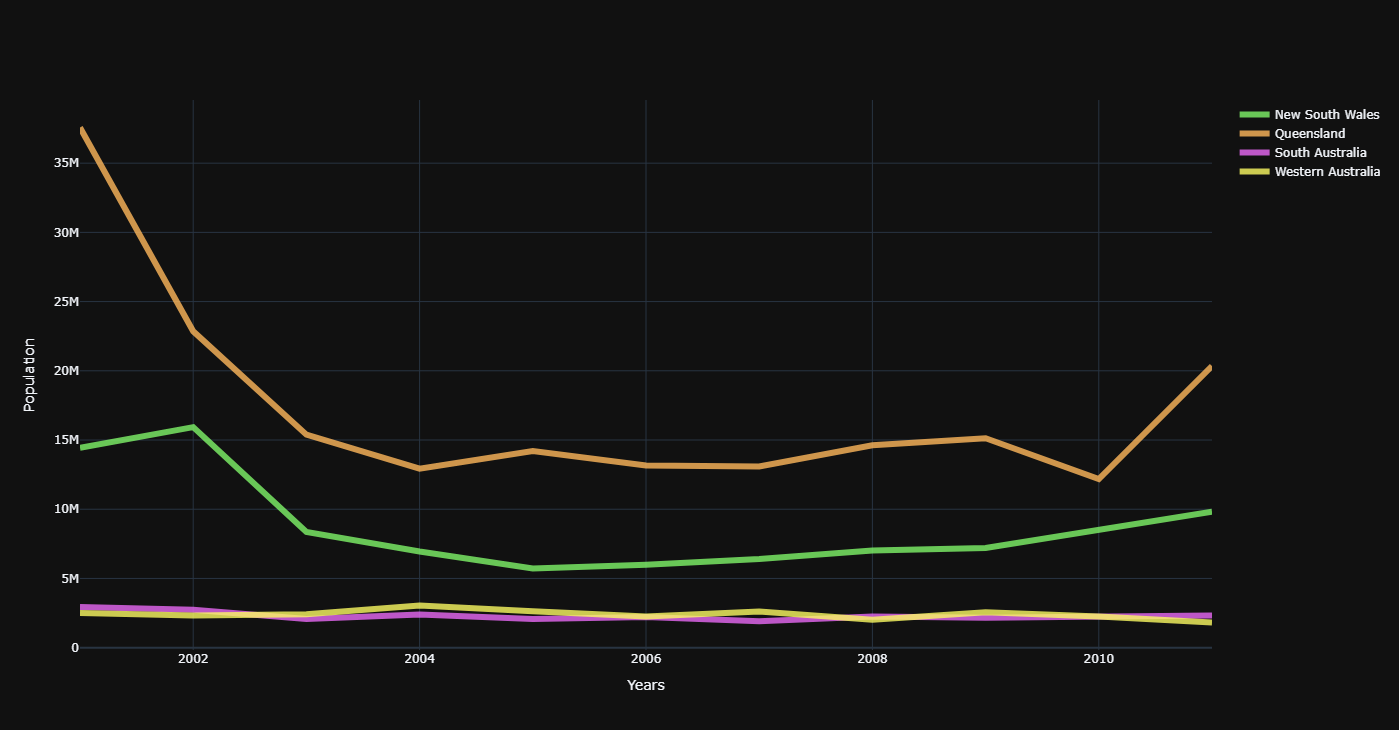

In [ ]:
fig_b = go.Figure()
for i in range(len(df_b.columns[1:])):
    fig_b.add_trace(go.Scatter(x = df_b.Year.to_list(), 
                             y = df_b[df_b.columns[1:][i]].to_list(), 
                             opacity = 0.8,
                             mode='lines', 
                             marker=dict(color=colors[2+i]), 
                             name=df_b.columns[1:][i],
                             line = dict(width=6.0),))
fig_b.update_layout(xaxis_title='Years', yaxis_title='Population', 
                  template = 'plotly_dark', width=790, height=730)

### go.histogram (province/species by year)

In [5]:
df_h2 = df.rename(columns={'State':'Province'})
df_h2 = df_h2.groupby(['Province']).mean()
df_h2.drop('Year', axis=1, inplace=True)
df_h2 = df_h2.T
df_h2.reset_index(inplace=True)
df_h2.rename(columns={'index':'Species'}, inplace=True)

fig_c = px.histogram(data_frame = df_h2, x = 'Species', y = df_h2.columns, barmode='group')
fig_c.update_layout(title=dict(font=dict(size=24))) 
fig_c.update_layout(title={'text': "Provincial Population by Species",
                            'x':0.45, 'y':0.95,
                            'xanchor': 'center'},
                    xaxis_title = '', yaxis_title='', 
                    title_font_size= 24,
                    template = 'plotly_dark', 
                    width=790, height=730)


# Table Data

In [6]:
df.to_dict('records'), [{"name": i, "id": i} for i in df.columns]

([{'Year': 2011,
   'State': 'South Australia',
   'Red': 1158000,
   'Western Grey': 674800,
   'Eastern Grey': 0,
   'Wallaroo': 494800},
  {'Year': 2011,
   'State': 'Western Australia',
   'Red': 638185,
   'Western Grey': 1177534,
   'Eastern Grey': 0,
   'Wallaroo': 0},
  {'Year': 2011,
   'State': 'New South Wales',
   'Red': 3972522,
   'Western Grey': 496059,
   'Eastern Grey': 5258104,
   'Wallaroo': 88430},
  {'Year': 2011,
   'State': 'Queensland',
   'Red': 5745591,
   'Western Grey': 0,
   'Eastern Grey': 10799679,
   'Wallaroo': 3799973},
  {'Year': 2010,
   'State': 'South Australia',
   'Red': 1074000,
   'Western Grey': 720000,
   'Eastern Grey': 0,
   'Wallaroo': 411000},
  {'Year': 2010,
   'State': 'Western Australia',
   'Red': 850731,
   'Western Grey': 1407376,
   'Eastern Grey': 0,
   'Wallaroo': 0},
  {'Year': 2010,
   'State': 'New South Wales',
   'Red': 3013908,
   'Western Grey': 662982,
   'Eastern Grey': 4756792,
   'Wallaroo': 88430},
  {'Year': 2010,
 